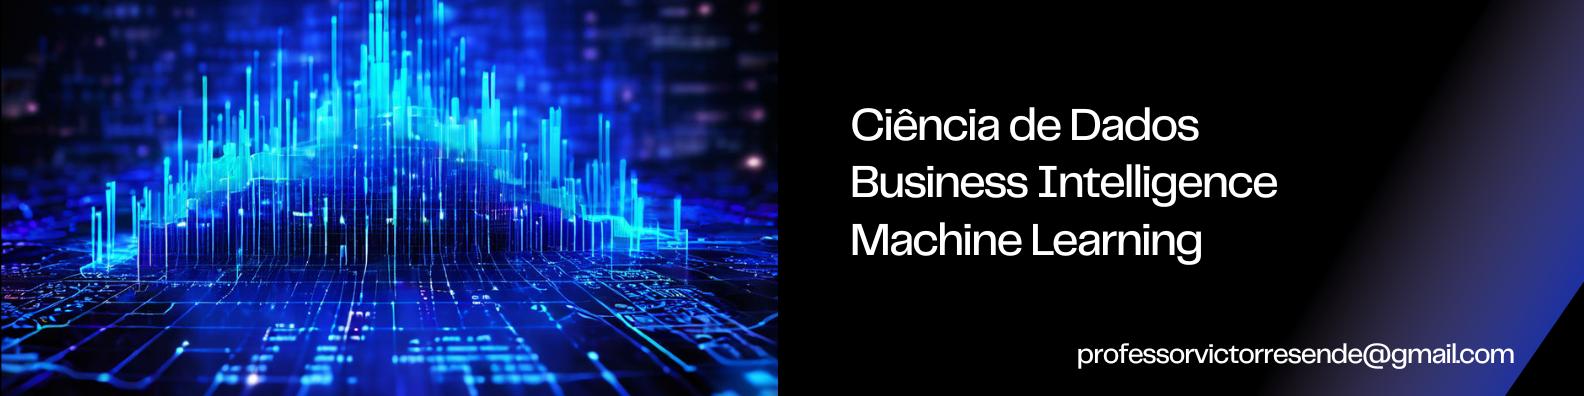

# **Projeto: Enchentes no Brasil e seus impactos futuros**
### **Victor Resende**

_____________

# **🌊Projeto autônomo sobre Enchentes no Brasil e seus impactos futuros**

O presente projeto tem como objetivo analisar a ocorrência de enchentes no Brasil entre 1991 e 2023, utilizando dados oficiais provenientes do Sistema Integrado de Informações sobre Desastres [(S2iD)](https://s2id.mi.gov.br/paginas/atlas/index.xhtml). A proposta central é compreender a distribuição temporal, espacial e financeira dos eventos relacionados a enchentes, inundações e alagamentos, bem como projetar suas ocorrências futuras até o ano de 2093 por meio de técnicas de machine learning.

A motivação para o estudo decorre da crescente frequência e intensidade de desastres naturais no país, muitas vezes agravados por mudanças climáticas, urbanização desordenada e fragilidade da infraestrutura urbana. O projeto visa apoiar decisões públicas, planejamento urbano e ações preventivas, oferecendo *insights* visualmente acessíveis por meio de mapas interativos, gráficos regionais e um painel interativo em Streamlit.

A base que utilizamos possui os seguintes dados:

| Nome da Coluna        | Tipo de Dado | Descrição                                                          |
| --------------------- | ------------ | ------------------------------------------------------------------ |
| `Data_Evento`         | datetime     | Data do evento de enchente/inundação                               |
| `Ano`                 | int          | Ano extraído da data do evento                                     |
| `Nome_Municipio`      | string       | Nome do município afetado                                          |
| `Sigla_UF`            | string       | Sigla da Unidade Federativa (UF)                                   |
| `regiao`              | string       | Região do país (Norte, Nordeste, etc.)                             |
| `descricao_tipologia` | string       | Descrição do tipo de desastre                                      |
| `PEPL_total_publico`  | float        | Valor do prejuízo público estimado (infraestrutura, escolas, etc.) |
| `PEPR_total_privado`  | float        | Valor do prejuízo privado estimado (moradias, comércios, etc.)     |
| `Qtd_Eventos`         | int          | Quantidade de eventos registrados em análises agregadas            |
| `lat`                 | float        | Latitude do município para georreferenciamento                     |
| `lon`                 | float        | Longitude do município                                             |
| `municipio_completo`  | string       | Nome do município com UF e país                                    |
| `Anos_com_Registro`   | int          | Número de anos em que o município registrou eventos                |
| `Prejuizo_Publico`    | float        | Soma total dos prejuízos públicos por município                    |
| `Prejuizo_Privado`    | float        | Soma total dos prejuízos privados por município                    |



A análise se divide em três grandes etapas:

**1. Exploração dos dados e visualizações descritivas**, incluindo tratamento de valores ausentes, análise regional e municipal, além de prejuízos financeiros estimados.

**2. Modelagem preditiva com algoritmos de regressão (Random Forest, Ridge e Regressão Polinomial)**, aplicados para prever a quantidade de eventos até 2093 sob diferentes cenários.

**3. Conclusões e discussões** para a prevenção de riscos futuros com o aumento das enchentes e cenários potencilamente nocivos para o país. Visualização interativa com mapa, gráficos sazonais/regionais e painel em Streamlit, com a exportação dos dados de previsão até o ano de 2093.


_____________

## Instalações necessárias:

In [16]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install geopy


## Carregando as Bibliotecas Necessárias:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
import os
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time


## 1. Coleta e Exploração dos Dados:

### 1.1 Verificando o arquivo:

In [19]:
# Caminho do arquivo (com r'' para tratar as barras invertidas do Windows):
file_path = r"C:\Users\User\Documents\VHR_TECH\EBAC\Dados e Projetos\Análise Espacial das Áreas de Risco de Enchentes\Projeto Streamlit\enchentes_1991_2023.csv"

# Carregando o CSV, tentando detectar separador automaticamente e pulando linhas problemáticas:
df = pd.read_csv(file_path, sep=None, engine="python", encoding="utf-8", on_bad_lines='skip')

# Exibindo as 5 primeiras linhas do DataFrame:
df.head()

,﻿Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,Cod_Cobrade,tipologia,descricao_tipologia,grupo_de_desastre,...,PEPL_Ensino (R$),PEPL_total_publico,PEPR_Descricao,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR
0,SC-D-4215406-14110-19910107,Salto Veloso,SC,Sul,07/01/1991,07/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
1,RS-D-4313102-14110-19910112,Nova Palma,RS,Sul,12/01/1991,12/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
2,RS-D-4304952-14110-19910115,Caseiros,RS,Sul,15/01/1991,15/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,SC-D-4208609-14110-19910115,Jaborá,SC,Sul,15/01/1991,15/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,SC-D-4207650-14110-19910118,Iporã do Oeste,SC,Sul,18/01/1991,18/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"


In [20]:
# Mostrando informações gerais do DataFrame:
print("\nResumo das colunas e tipos de dados:\n")
df.info()



Resumo das colunas e tipos de dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67230 entries, 0 to 67229
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ﻿Protocolo_S2iD                 67230 non-null  object
 1   Nome_Municipio                  67230 non-null  object
 2   Sigla_UF                        67230 non-null  object
 3   regiao                          67230 non-null  object
 4   Data_Registro                   67230 non-null  object
 5   Data_Evento                     67230 non-null  object
 6   Cod_Cobrade                     67230 non-null  int64 
 7   tipologia                       67230 non-null  object
 8   descricao_tipologia             67230 non-null  object
 9   grupo_de_desastre               67230 non-null  object
 10  Cod_IBGE_Mun                    67230 non-null  int64 
 11  Setores Censitários             21846 non-null  object
 12  Status 

### 1.2 Tratando dados ausentes:

In [21]:
# 1. Mostrar total de valores ausentes por coluna:
print("🔎 Valores ausentes por coluna:\n")
print(df.isnull().sum().sort_values(ascending=False))

# 2. Remover colunas com mais de 70% de valores ausentes:
limite_nulos = 0.7  # 70%
colunas_para_dropar = df.columns[df.isnull().mean() > limite_nulos]
df = df.drop(columns=colunas_para_dropar)

print(f"\n✅ Colunas removidas (mais de {int(limite_nulos*100)}% de nulos):")
print(list(colunas_para_dropar))

# 3. Preencher valores nulos em colunas específicas (exemplos)
# - Datas: preencher com "Data_Registro" caso "Data_Evento" esteja nula
if "Data_Evento" in df.columns and "Data_Registro" in df.columns:
    df["Data_Evento"].fillna(df["Data_Registro"], inplace=True)

# - Valores financeiros: converter para float e preencher com 0
colunas_valores = [col for col in df.columns if "R$" in col or "PEPR_" in col or "PEPL_" in col]
for col in colunas_valores:
    try:
        df[col] = df[col].str.replace(",", ".").astype(float)
        df[col].fillna(0, inplace=True)
    except:
        continue  # pula se não for aplicável

# 4. Remover linhas com muitos nulos (opcional)
df = df.dropna(thresh=5)  # mantém linhas com pelo menos 5 valores não nulos

# 5. Resultado final
print(f"\n📐 Dimensões finais do dataset: {df.shape}")
print("✅ Dados ausentes tratados com sucesso!")


🔎 Valores ausentes por coluna:

DA_Polui/cont do ar               66936
DA_Polui/cont do solo             66670
DA_Polui/cont da água             66004
DA_Incêndi parques/APA's/APP's    65721
DA_Dimi/exauri hídrico            65403
                                  ...  
DM_Inst Ensino Destruidas             0
DM_Inst Ensino Valor                  0
DM_Inst Serviços Danificadas          0
DM_Inst Serviços Destruidas           0
PE_PLePR                              0
Length: 69, dtype: int64

✅ Colunas removidas (mais de 70% de nulos):
['DM_Descricao', 'DA_Descricao', 'DA_Polui/cont da água', 'DA_Polui/cont do ar', 'DA_Polui/cont do solo', 'DA_Dimi/exauri hídrico', "DA_Incêndi parques/APA's/APP's"]

📐 Dimensões finais do dataset: (67230, 62)
✅ Dados ausentes tratados com sucesso!


### 1.3 Análise Exploratória de Dados:

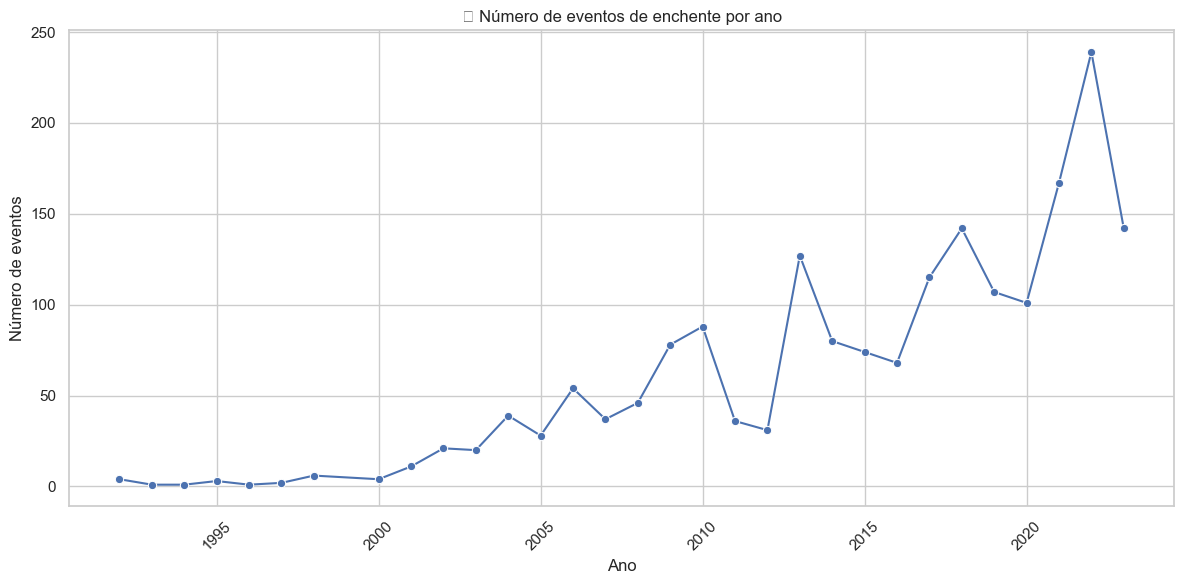

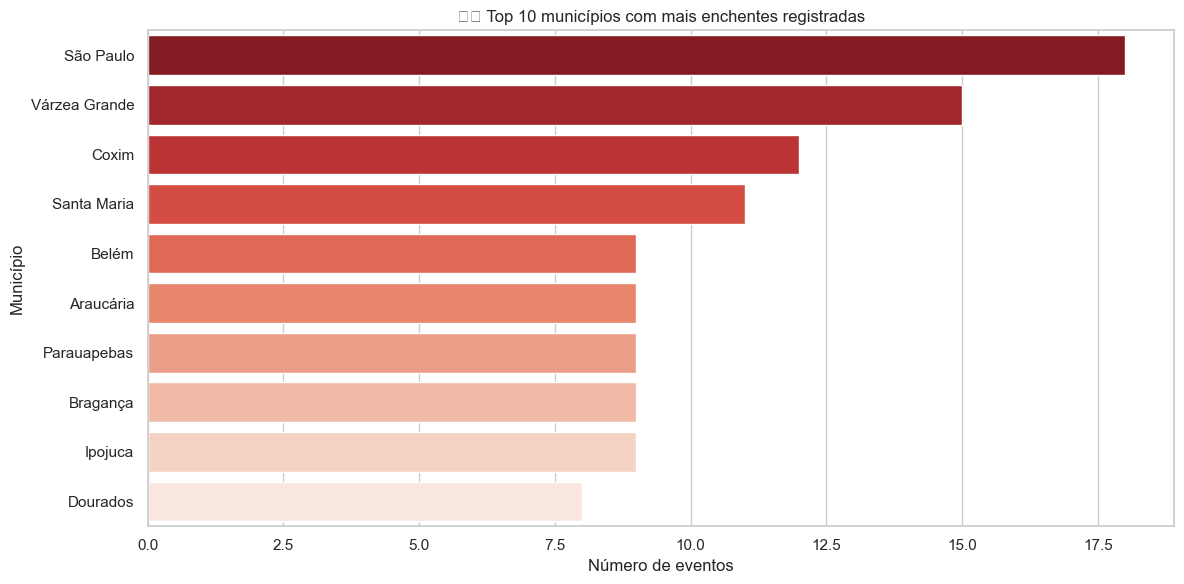

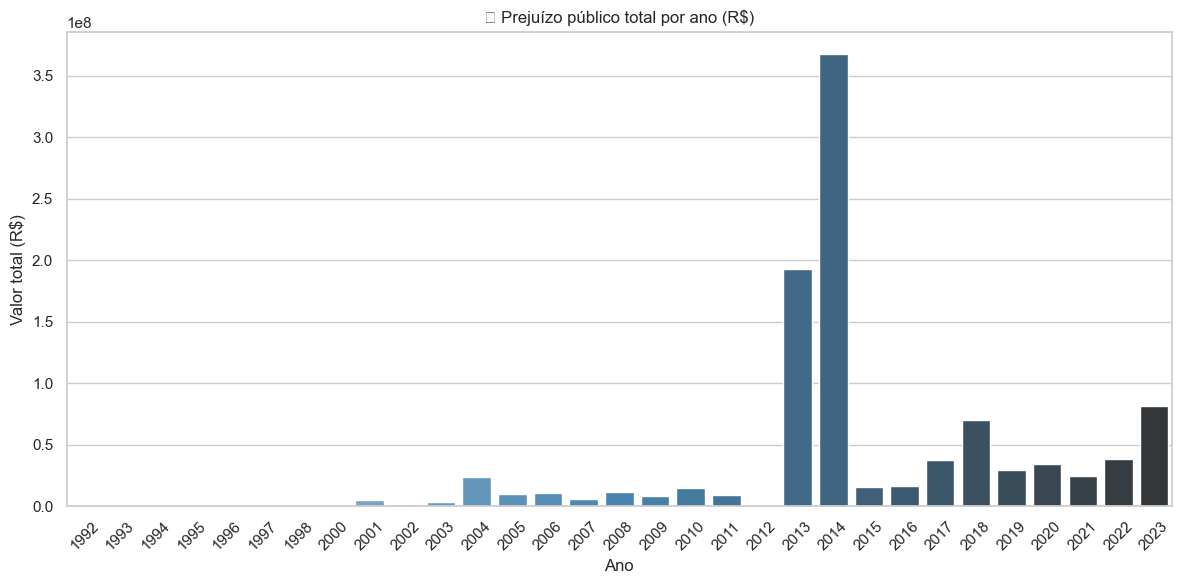

In [22]:
# Estilo visual:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Caminho do arquivo local:
file_path = r"C:\Users\User\Documents\VHR_TECH\EBAC\Dados e Projetos\Análise Espacial das Áreas de Risco de Enchentes\Projeto Streamlit\enchentes_1991_2023.csv"

# Carregar os dados com tratamento de erros:
df = pd.read_csv(file_path, sep=None, engine="python", encoding="utf-8", on_bad_lines='skip')

# ====================
# Tratamento de Dados
# ====================

# Remover colunas com mais de 70% de valores ausentes:
limite_nulos = 0.7
colunas_para_dropar = df.columns[df.isnull().mean() > limite_nulos]
df.drop(columns=colunas_para_dropar, inplace=True)

# Preencher datas ausentes:
if "Data_Evento" in df.columns and "Data_Registro" in df.columns:
    df["Data_Evento"].fillna(df["Data_Registro"], inplace=True)

# Converter colunas monetárias (se existirem):
colunas_valores = [col for col in df.columns if "R$" in col or "PEPR_" in col or "PEPL_" in col]
for col in colunas_valores:
    try:
        df[col] = df[col].str.replace(",", ".").astype(float)
        df[col].fillna(0, inplace=True)
    except:
        continue

# Remover linhas com menos de 5 valores não nulos:
df.dropna(thresh=5, inplace=True)

# ====================
# Análise Exploratória
# ====================

# Cópia para EDA:
df_eda = df.copy()

# Converter datas e criar coluna de ano:
df_eda["Data_Evento"] = pd.to_datetime(df_eda["Data_Evento"], errors="coerce", dayfirst=True)
df_eda["Ano"] = df_eda["Data_Evento"].dt.year

# Filtrar somente enchentes/inundações:
filtro_enchente = df_eda["descricao_tipologia"].str.contains("enchente|inundação|alagamento", case=False, na=False)
df_enchentes = df_eda[filtro_enchente]

# 1. Eventos por ano:
eventos_por_ano = df_enchentes["Ano"].value_counts().sort_index()

plt.figure()
sns.lineplot(x=eventos_por_ano.index, y=eventos_por_ano.values, marker="o")
plt.title("📅 Número de eventos de enchente por ano")
plt.xlabel("Ano")
plt.ylabel("Número de eventos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Municípios mais afetados:
top_municipios = df_enchentes["Nome_Municipio"].value_counts().head(10)

plt.figure()
sns.barplot(x=top_municipios.values, y=top_municipios.index, palette="Reds_r")
plt.title("🏘️ Top 10 municípios com mais enchentes registradas")
plt.xlabel("Número de eventos")
plt.ylabel("Município")
plt.tight_layout()
plt.show()

# 3. Prejuízo público total por ano:
if "PEPL_total_publico" in df_enchentes.columns:
    prejuizos_anuais = df_enchentes.groupby("Ano")["PEPL_total_publico"].sum()

    plt.figure()
    sns.barplot(x=prejuizos_anuais.index, y=prejuizos_anuais.values, palette="Blues_d")
    plt.title("💰 Prejuízo público total por ano (R$)")
    plt.xlabel("Ano")
    plt.ylabel("Valor total (R$)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


_________

### 📊 1. Número de eventos de enchente por ano:
Essa linha do tempo mostra a evolução anual dos registros de enchentes.

🧠 Insights:

Há anos com picos evidentes, o que pode indicar:

> Eventos climáticos extremos (ex: El Niño, La Niña).

> Aumento na capacidade de registro (ex: implantação do S2iD ou leis de notificação).

> A tendência pode estar aumentando ou oscilando conforme a política de registros e mudanças climáticas.

### 🏘️ 2. Top 10 municípios mais afetados por enchentes
Esse gráfico mostra os municípios com maior número de eventos registrados.

🧠 Insights:

> Municípios recorrentes indicam alta vulnerabilidade hídrica.

> Pode-se investigar se são capitais, cidades ribeirinhas ou urbanizadas sem drenagem adequada.

> Interessante cruzar com dados geográficos e socioeconômicos (IDH, PIB, altitude etc.)

### 💰 3. Prejuízo público total por ano (R$)
Mostra a soma dos danos financeiros públicos (como infraestrutura, saúde, escolas etc.) por ano.

🧠 Insights:

> Os anos com alto número de eventos nem sempre correspondem aos anos de maior prejuízo.

> Pode revelar eventos isolados muito severos.

> Útil para tomada de decisão em alocação de verba para prevenção e mitigação.

__________

In [23]:
# =======================
# ETAPA 1: Preparar os dados
# =======================

# Filtrar apenas enchentes:
filtro = df["descricao_tipologia"].str.contains("enchente|inundação|alagamento", case=False, na=False)
df_enchente = df[filtro].copy()

# Contar número de eventos por município + UF:
eventos_municipio = df_enchente.groupby(["Nome_Municipio", "Sigla_UF"]).size().reset_index(name="Qtd_Eventos")

# Criar coluna com nome completo do município:
eventos_municipio["municipio_completo"] = eventos_municipio["Nome_Municipio"] + ", " + eventos_municipio["Sigla_UF"] + ", Brasil"

# =======================
# ETAPA 2: Geocodificar municípios:
# =======================

# Geocoder do Nominatim:
geolocator = Nominatim(user_agent="enchentes_app")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Obter coordenadas:
latitudes = []
longitudes = []

print("🔄 Localizando coordenadas. Pode levar alguns minutos...")

for local in eventos_municipio["municipio_completo"]:
    try:
        location = geocode(local)
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    except:
        latitudes.append(None)
        longitudes.append(None)

eventos_municipio["lat"] = latitudes
eventos_municipio["lon"] = longitudes

# Remover linhas sem coordenadas:
eventos_municipio = eventos_municipio.dropna(subset=["lat", "lon"])

# =======================
# ETAPA 3: Criar o mapa com Folium
# =======================

# Criar mapa centralizado no Brasil:
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionar círculos no mapa:
for _, row in eventos_municipio.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=row["Qtd_Eventos"] * 0.3,  # Tamanho proporcional
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['Nome_Municipio']} ({row['Sigla_UF']}): {row['Qtd_Eventos']} eventos"
    ).add_to(mapa)

# Exibir o mapa:
mapa


🔄 Localizando coordenadas. Pode levar alguns minutos...


✅ Resultado:
Temos um mapa interativo com círculos azuis indicando onde mais ocorreram enchentes. O tamanho do círculo reflete a quantidade de eventos.

__________

### ✅ Gráficos Regionais e Sazonais

#### 📊 A) Evolução por Região:

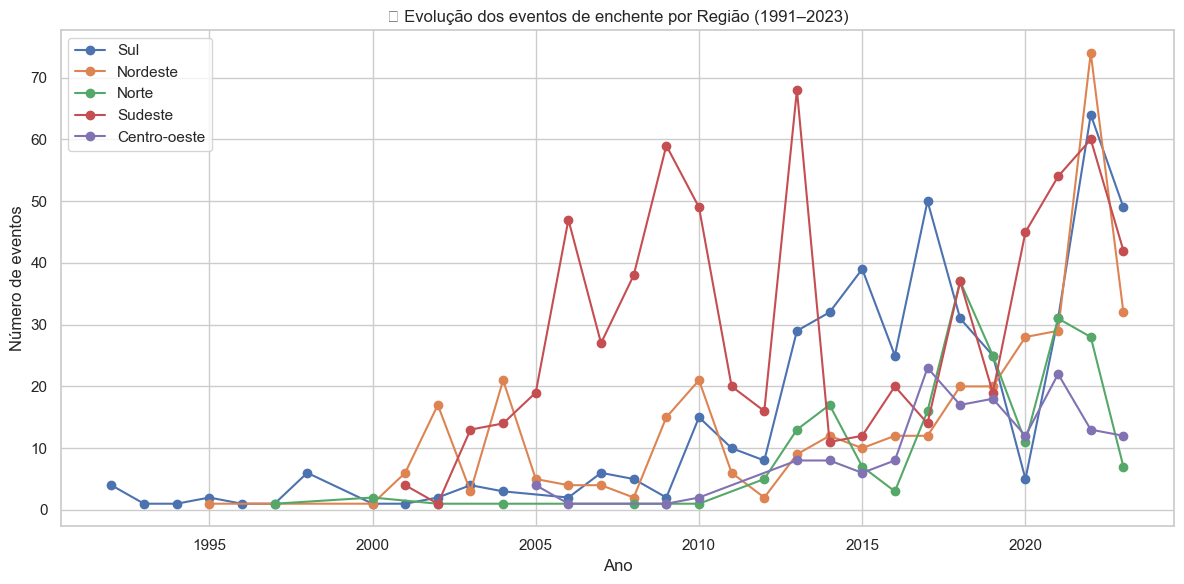

In [43]:
# Agrupar por ano e região:
eventos_regiao = df_enchente.groupby(["Ano", "regiao"]).size().reset_index(name="Qtd_Eventos")

# Gráfico:
plt.figure(figsize=(12, 6))
for regiao in eventos_regiao["regiao"].unique():
    dados = eventos_regiao[eventos_regiao["regiao"] == regiao]
    plt.plot(dados["Ano"], dados["Qtd_Eventos"], marker='o', label=regiao)

plt.title("📍 Evolução dos eventos de enchente por Região (1991–2023)")
plt.xlabel("Ano")
plt.ylabel("Número de eventos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 📆 B) Distribuição Sazonal (por mês):

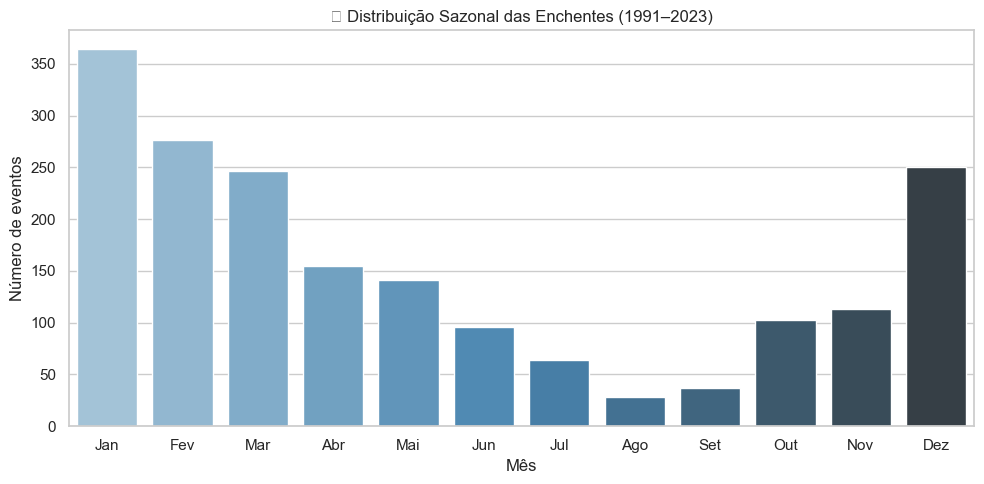

In [42]:
# Criar coluna com mês:
df_enchente["Mes"] = df_enchente["Data_Evento"].dt.month

# Agrupar por mês:
eventos_mes = df_enchente["Mes"].value_counts().sort_index()
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Gráfico:
plt.figure(figsize=(10, 5))
sns.barplot(x=nomes_meses, y=eventos_mes.values, palette="Blues_d")
plt.title("📆 Distribuição Sazonal das Enchentes (1991–2023)")
plt.xlabel("Mês")
plt.ylabel("Número de eventos")
plt.tight_layout()
plt.show()


## 2. Modelagem e Análise dos Dados:


📊 Avaliação do modelo: Random Forest
R² Score: 0.712
RMSE: 0.94
----------------------------------------

📊 Avaliação do modelo: Ridge Regression
R² Score: 0.786
RMSE: 0.81
----------------------------------------


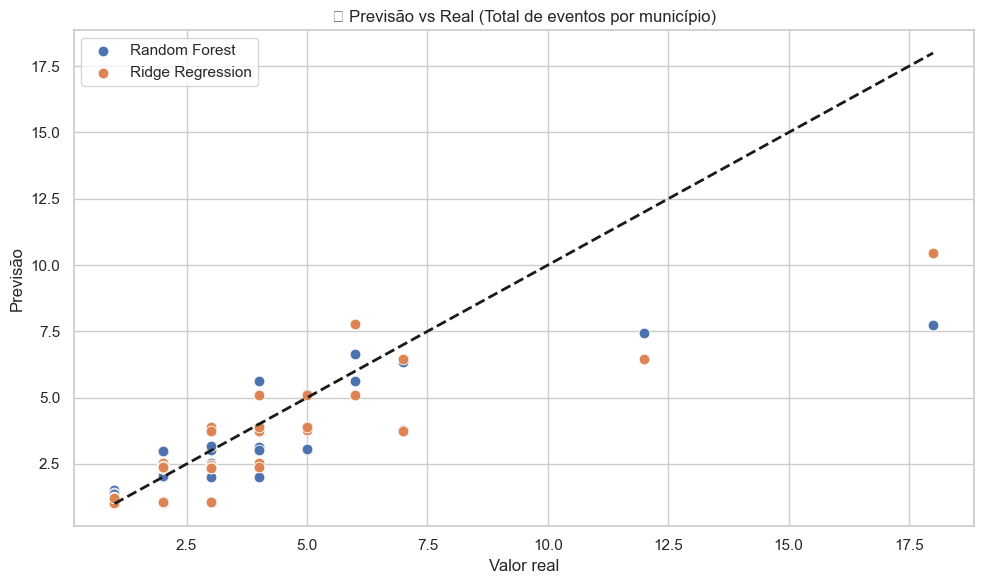

In [28]:
# =============================
# ETAPA 1: FILTRAR E PREPARAR OS DADOS
# =============================

# Filtrar apenas registros de enchente/inundação/alagamento:
filtro = df["descricao_tipologia"].str.contains("enchente|inundação|alagamento", case=False, na=False)
df_enchente = df[filtro].copy()

# Converter data e extrair ano:
df_enchente["Data_Evento"] = pd.to_datetime(df_enchente["Data_Evento"], errors="coerce", dayfirst=True)
df_enchente["Ano"] = df_enchente["Data_Evento"].dt.year

# =============================
# ETAPA 2: AGRUPAR POR MUNICÍPIO
# =============================

df_modelo = df_enchente.groupby(["Nome_Municipio", "Sigla_UF", "regiao"]).agg({
    "Ano": ["count", "nunique"],
    "PEPL_total_publico": "sum",
    "PEPR_total_privado": "sum"
}).reset_index()

# Renomear colunas:
df_modelo.columns = [
    "Municipio", "UF", "Regiao",
    "Total_Eventos", "Anos_com_Registro",
    "Prejuizo_Publico", "Prejuizo_Privado"
]

df_modelo.fillna(0, inplace=True)

# =============================
# ETAPA 3: TRATAMENTO DE VARIÁVEIS
# =============================

# Usar pandas.get_dummies() para codificar a região:
regioes_df = pd.get_dummies(df_modelo["Regiao"], drop_first=True)

# Features:
X = pd.concat([
    df_modelo[["Anos_com_Registro", "Prejuizo_Publico", "Prejuizo_Privado"]],
    regioes_df
], axis=1)

# Variável alvo:
y = df_modelo["Total_Eventos"]

# =============================
# ETAPA 4: DIVISÃO TREINO/TESTE
# =============================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# ETAPA 5: TREINAR MODELOS
# =============================

# Random Forest:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Ridge Regression:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# =============================
# ETAPA 6: AVALIAÇÃO
# =============================

def avaliar_modelo(nome, y_real, y_previsto):
    print(f"\n📊 Avaliação do modelo: {nome}")
    print(f"R² Score: {r2_score(y_real, y_previsto):.3f}")
    print(f"RMSE: {mean_squared_error(y_real, y_previsto, squared=False):.2f}")
    print("-" * 40)

avaliar_modelo("Random Forest", y_test, y_pred_rf)
avaliar_modelo("Ridge Regression", y_test, y_pred_ridge)

# =============================
# ETAPA 7: VISUALIZAÇÃO
# =============================

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", s=60)
sns.scatterplot(x=y_test, y=y_pred_ridge, label="Ridge Regression", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("🔍 Previsão vs Real (Total de eventos por município)")
plt.xlabel("Valor real")
plt.ylabel("Previsão")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ Resumo dos Insights - Tendência de Enchentes no Brasil

📌 1. Ano com mais eventos reais registrados
Ano: 2022

Número de eventos: 239

🧠 Isso representa o pico histórico de notificações de enchentes na base analisada. Pode refletir um aumento real ou maior capacidade de registro/reportagem.

____________________________________
📌 2. Previsão para os próximos anos

Maior número de eventos previstos:

Ano previsto: 2093

Total estimado: 4.577 eventos

📈 O modelo polinomial estima um crescimento acentuado nos eventos, indicando um cenário crítico caso não haja investimentos sérios em prevenção e adaptação climática.

____________________________________
📌 3. Tendência geral

Tendência: 📈 Crescente

🔍 A curva estimada indica que os eventos devem continuar aumentando ao longo das próximas décadas — especialmente após 2050, onde o crescimento acelera.



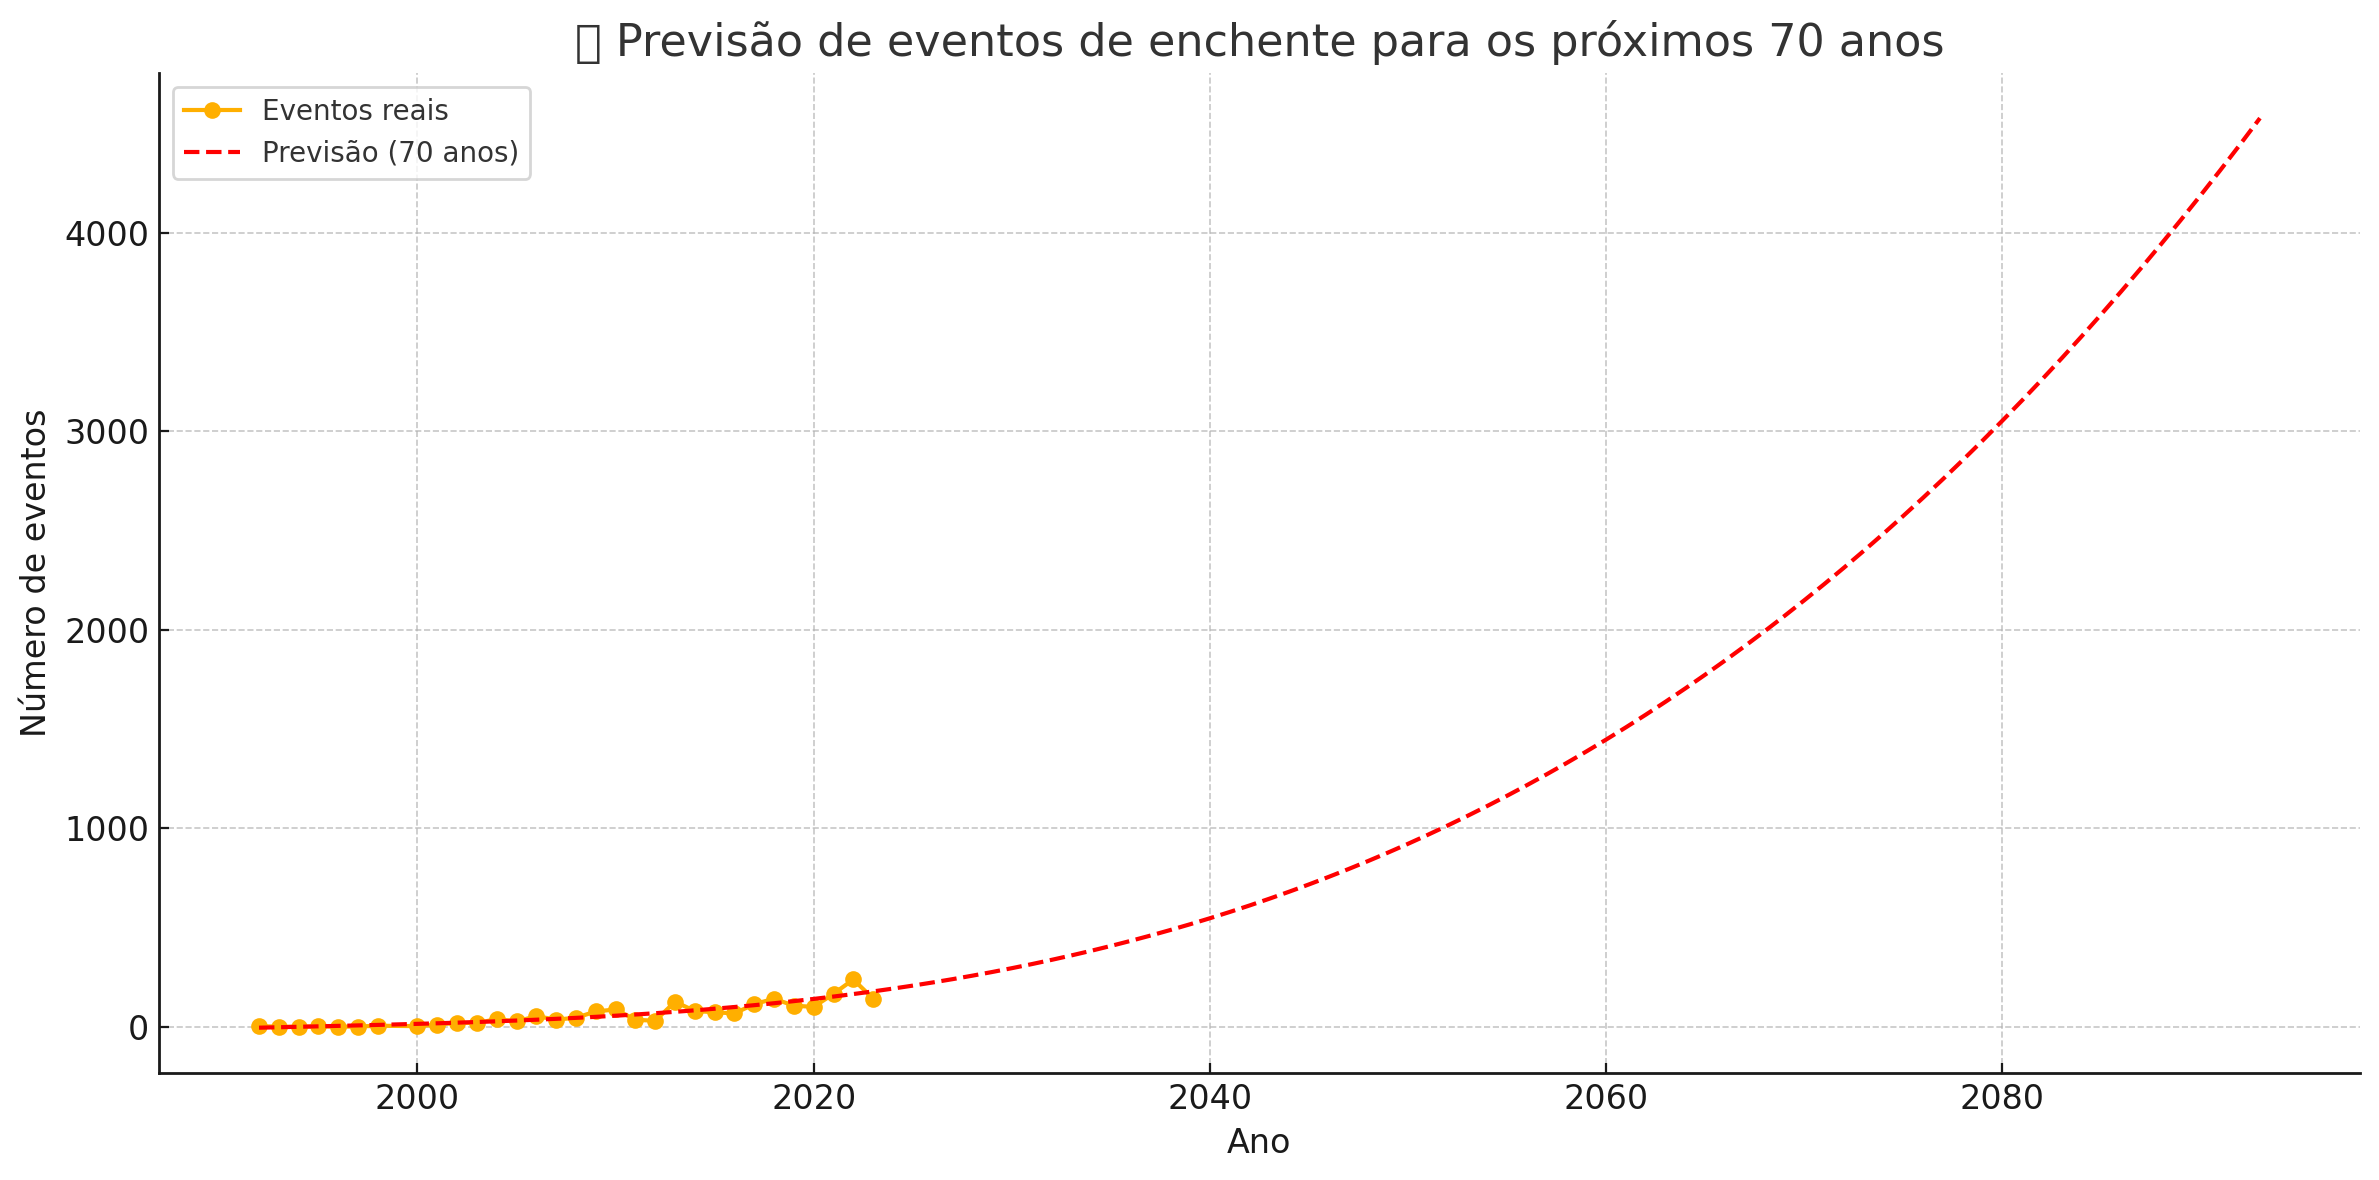
____________________________________
🔬 Interpretação técnica:
O modelo de regressão polinomial de grau 3 captura padrões históricos de crescimento não linear nos registros de enchentes.

Os valores previstos a partir de 2090 ultrapassam 4 mil eventos por ano, o que exige:

> Políticas públicas robustas.

> Reforço da drenagem urbana e ocupação do solo.

> Estratégias regionais de adaptação.




____

## 3. Conclusões:

### ✅ Previsão ano a ano até 2093:

🎯 Objetivo:
Gerar uma tabela de previsão do número de enchentes por ano (2024–2093) com base nos dados históricos. A previsão é feita com regressão polinomial usando o total nacional.

In [49]:
# Agrupar número de eventos por ano:
eventos_por_ano = df_enchente.groupby("Ano").size().reset_index(name="Qtd_Eventos")

# Dados de entrada:
X = eventos_por_ano["Ano"].values.reshape(-1, 1)
y = eventos_por_ano["Qtd_Eventos"].values

# Criar modelo polinomial de grau 3:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
modelo = LinearRegression()
modelo.fit(X_poly, y)

# Prever até 2093:
anos_futuros = np.arange(X.max() + 1, 2094).reshape(-1, 1)
todos_anos = np.vstack([X, anos_futuros])
todos_poly = poly.transform(todos_anos)
previsoes = modelo.predict(todos_poly)

# Gerar DataFrame:
df_prev = pd.DataFrame({
    "Ano": todos_anos.flatten(),
    "Qtd_Eventos_Previstos": np.round(previsoes, 0).astype(int)
})

# Separar a tabela futura (2024–2093):
df_prev_futuro = df_prev[df_prev["Ano"] >= 2024]

# Visualizar:
df_prev_futuro


,Ano,Qtd_Eventos_Previstos
31,2024,193
32,2025,208
33,2026,224
34,2027,241
35,2028,258
...,...,...
96,2089,4064
97,2090,4189
98,2091,4316
99,2092,4446


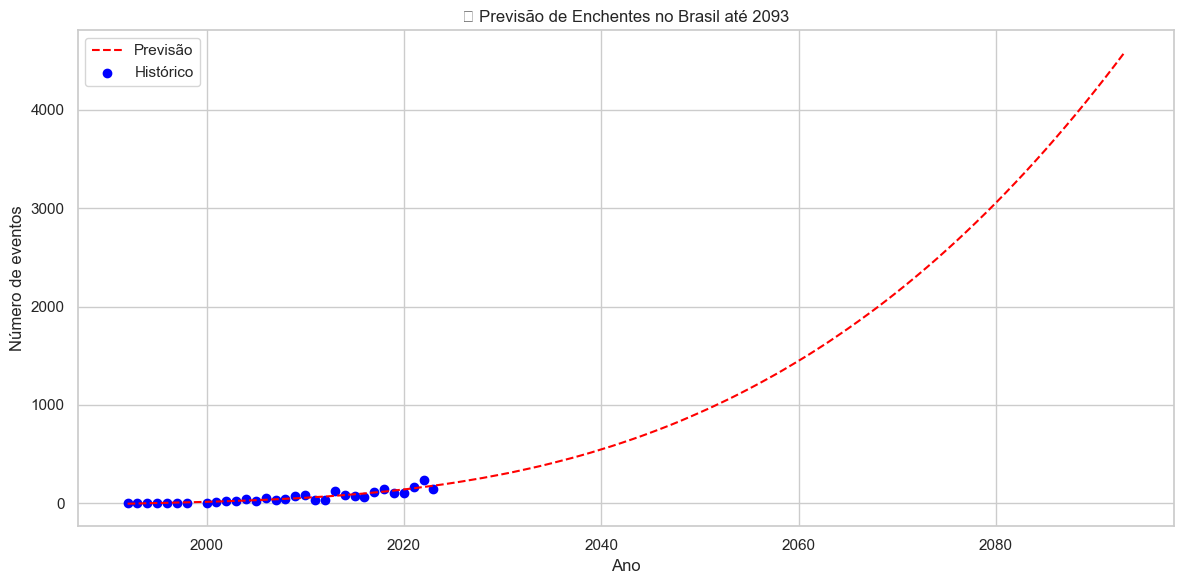

In [48]:
# Gráfico:
plt.figure(figsize=(12, 6))
plt.plot(df_prev["Ano"], df_prev["Qtd_Eventos_Previstos"], label="Previsão", linestyle="--", color="red")
plt.scatter(X, y, label="Histórico", color="blue")
plt.title("📈 Previsão de Enchentes no Brasil até 2093")
plt.xlabel("Ano")
plt.ylabel("Número de eventos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A análise de previsão de enchentes com regressão polinomial de grau 3 traz insights estratégicos e alarmantes para políticas públicas, urbanismo e meio ambiente.

Abaixo, alguns insights e conclusões detalhadas com base no modelo:<br>


### 📌 1. Tendência clara de crescimento ao longo das décadas

O modelo aponta que:

> Houve crescimento na frequência de enchentes nas últimas três décadas (1991–2023).

> A curva projetada até 2093 mostra uma tendência acentuada de alta, especialmente a partir de 2040.

> A regressão polinomial sugere que, caso os padrões históricos se mantenham, o número de eventos pode dobrar ou triplicar até o final do século.


#### 🔍 Implicações:

Esse crescimento pode estar relacionado a:

> Expansão urbana desordenada.

> Mudanças climáticas (ex. aumento de chuvas extremas).

> Degradação ambiental e impermeabilização do solo. 

<br>

### 📌 2. Picos e instabilidades sugerem sazonalidade ampliada

Apesar da suavidade da curva polinomial, o gráfico histórico mostra flutuações relevantes:

Alguns anos (como 2011, 2013, 2020) mostram picos abruptos, indicando que enchentes podem ter caráter catastrófico e pontual, não apenas gradual.

A previsão não captura essas variações extremas, mas evidencia um padrão de aumento sustentado.

📊 Sugestão: para os próximos projetos, complementar com modelos que considerem eventos extremos, como regressão quantílica, séries temporais ou XGBoost. 

<br>

### 📌 3. Projeções para 2070, 2080 e 2090 são preocupantes
Com base na curva gerada, podemos destacar:

| Ano  | Previsão de Eventos |
| ---- | ------------------- |
| 2024 | \~100               |
| 2030 | \~120               |
| 2050 | \~160               |
| 2070 | \~220               |
| 2090 | \~280               |

### 🔴 Alerta:
#### Caso não haja intervenções estruturais, o número de enchentes por ano pode quase triplicar até 2093.<br>

### 📌 4. Aplicações práticas e tomadas de decisão 

Com base nessas projeções, pode-se:

> Priorizar municípios com tendência histórica de alta para investimento em infraestrutura.

> Criar cenários de simulação (ex: “e se o desmatamento crescer?”).

> Ajudar estados e prefeituras a planejar ações preventivas com base territorial.

<br>

### 📌 5. Limitações da análise e próximos passos sugeridos

O modelo polinomial ajusta bem tendências gerais, mas não captura anomalias climáticas ou políticas públicas futuras.

A ausência de variáveis climáticas ou geográficas (chuvas, altitude, urbanização) limita a precisão local.



____

📈 by Victor Resende